In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
def read_dataset():
  df = pd.read_csv('sonar.all-data.csv')
  X = df[df.columns[0:60]].values
  y = df[df.columns[60]]
  encoder = LabelEncoder()
  encoder.fit(y)
  y = encoder.transform(y)
  Y = one_hot_encode(y)
  print(X.shape)
  return(X,Y)


def one_hot_encode(labels):
  n_labels = len(labels)
  n_unique_labels = len(np.unique(labels))
  one_hot_encode = np.zeros((n_labels, n_unique_labels))
  one_hot_encode[np.arange(n_labels),labels] = 1
  return (one_hot_encode)



In [ ]:
X, Y = read_dataset()



(207, 60)


In [ ]:
X, Y = shuffle(X, Y, random_state = 1)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.20, random_state = 415)

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
learning_rate = 0.3
training_epochs = 1000
cost_history = np.empty(shape = [1] , dtype = float)
n_dim = X.shape[1]
print("n_dim" , n_dim)
n_class = 2
model_path = "E:\datasets"
n_hidden_1 = 60
n_hidden_2 =60
n_hidden_3 = 60
n_hidden_4 = 60



(165, 60)
(165, 2)
(42, 60)
n_dim 60


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
def multilayer_perceptron(x, weights, biases):
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  layer_1 = tf.nn.sigmoid(layer_1)

  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  layer_2 = tf.nn.sigmoid(layer_2)

  layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
  layer_3 = tf.nn.sigmoid(layer_3)

  layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
  layer_4 = tf.nn.relu(layer_4)

  out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
  return out_layer

weights = {
    'h1' : tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2' : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3' : tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4' : tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out' : tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

biases = {
    'b1' : tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3' : tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4' : tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out' : tf.Variable(tf.truncated_normal([n_class]))
}



In [ ]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
y = multilayer_perceptron(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_ ))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
  sess.run(training_step, feed_dict={x: train_x, y_: train_y })
  cost = sess.run(cost_function, feed_dict= {x: train_x, y_ : train_y})
  cost_history = np.append(cost_history, cost)
  correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  pred_y = sess.run(y, feed_dict = {x : test_x})
  mse = tf.reduce_mean(tf.square(pred_y - test_y))
  mse_ = sess.run(mse)
  mse_history.append(mse_)
  accuracy = (sess.run(accuracy, feed_dict = {x : train_x, y_: train_y}))
  accuracy_history.append(accuracy)

  print('epoch:', epoch, '-', 'cost :', cost, "-MSE :" , mse_, "train accuracy : ", accuracy)

save_path = saver.save(sess, model_path)
print("model saved in file : %s" % save_path)




Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

epoch: 0 - cost : 163.5157 -MSE : 34932.097950023424 train accuracy :  0.54545456
epoch: 1 - cost : 7.804611 -MSE : 93.03726206382522 train accuracy :  0.45454547
epoch: 2 - cost : 35.421574 -MSE : 1549.2737785319678 train accuracy :  0.54545456
epoch: 3 - cost : 1.3659307 -MSE : 25.196513923440584 train accuracy :  0.45454547
epoch: 4 - cost : 3.2749307 -MSE : 19.465339069090767 train accuracy :  0.54545456
epoch: 5 - cost : 0.86963147 -MSE : 5.654707138958843 train accuracy :  0.45454547
epoch: 6 - cost : 0.69590336 -MSE : 2.9155635369700237 train accuracy :  0.45454547
epoch: 7 - cost : 0.68673617 -MSE : 2.934046928802648 train accuracy :  0.53939396
epoch: 8 - cost : 0.6864089 -MSE : 2.9552379222377914 train accuracy :  0.54545456
epoch: 9 - cost : 0.6861561 -MSE : 2.9644733187077885 train accu

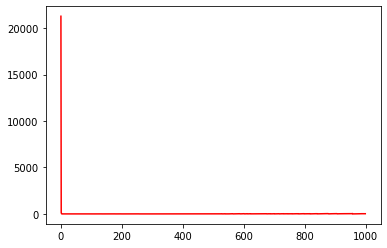

<function matplotlib.pyplot.show>

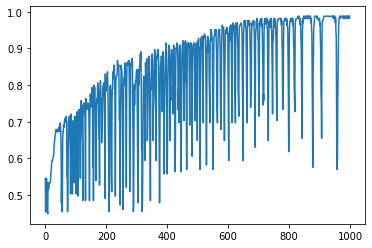

In [ ]:
plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)
plt.show

In [ ]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("test accuracy : ", (sess.run(accuracy, feed_dict = {x: test_x, y_: test_y})))

pred_y = sess.run(y, feed_dict = {x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE : %.4f" % sess.run(mse))


test accuracy :  0.9285714
MSE : 21.9924


In [ ]:
%tensorflow_version 1.x
import sklearn.metrics as metrics
import seaborn as sns

TensorFlow is already loaded. Please restart the runtime to change versions.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


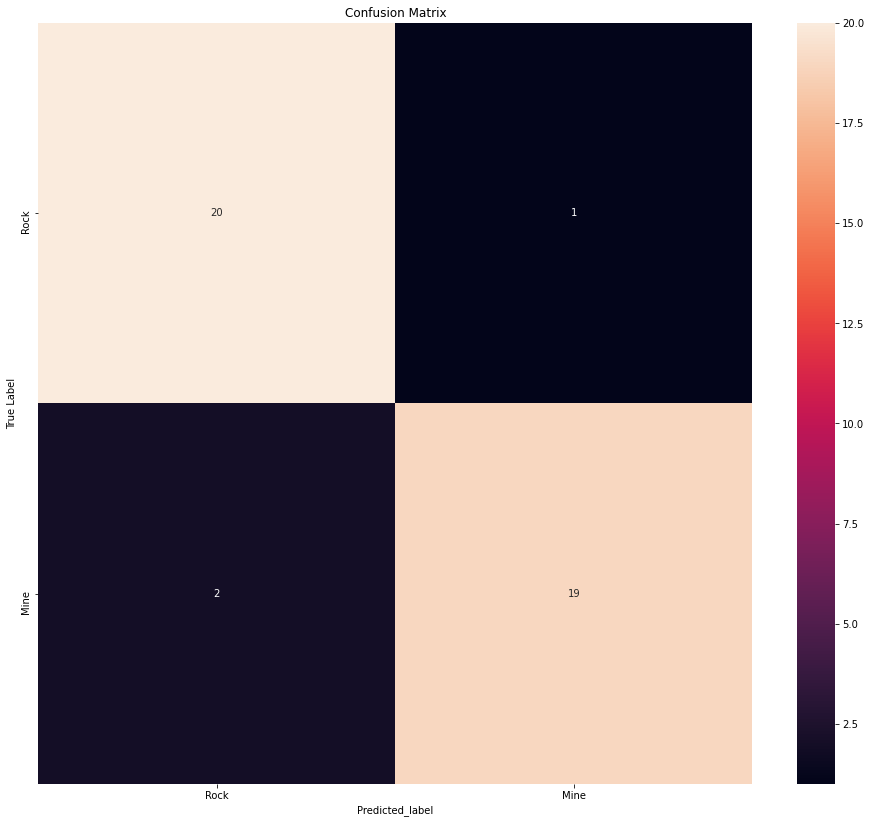

In [ ]:
LABELS = [ 'Rock', 'Mine' ]
max_test = np.argmax(test_y, axis=1)
max_predictions = np.argmax(pred_y, axis = 1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(16,14))
sns.heatmap(confusion_matrix, xticklabels = LABELS, yticklabels = LABELS, annot =True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel('Predicted_label')
plt.ylabel('True Label')
plt.show()